# Packages

In [35]:
import os

import pandas as pd
from bioat.lib.libpandas import set_option
from bioat.lib.libpath import HOME
from pybedtools import BedTool

set_option()

INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.max_columns=None
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.max_columns=None
INFO  @ 2023-08-16 01:37:36 bioat.lib.libpandas.set_option: set pandas: display.max_columns=No

# classification for TAS-independent

## get df_arts

In [9]:
df_arts = pd.read_csv('../art_seqinfo/df_arts.csv')
df_arts

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182511,4182527,-,17,T,17,0,17,0,0,0,95.0,TACGCGGCGGGGCTGTC,|||||||||||||||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,0
1,chr9,129203049,129203171,chr9_129203099_129203121,chr9,129203129,129203145,-,8,T,13,4,17,0,4,0,87.0,TACGCGACAGAACTGTC,||||||.|.|..|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,1
2,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5022005,5022021,-,7,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,2
3,chr9,5021875,5022047,chr9_5021925_5021997,chr9,5022005,5022021,-,8,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,3
4,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182476,4182492,+,2,C,17,0,17,0,0,0,85.0,CCGGGAGGCCGCACTTG,|||||||||||||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27132,chr16,89268826,89268947,chr16_89268876_89268897,chr16,89268919,89268935,-,43,C,8,9,8,9,0,0,4.0,CAGAGCAGGGCAGGGCC,|X||XX|X|X|XXX||X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27132
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


## get df_arts_tas_dep

In [10]:
df_arts_tas_dep = pd.read_csv('../art_seqinfo/df_arts_tas_dep.csv')
df_arts_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,13,3,13,3,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,11,1,11,1,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,8,4,11,1,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,12,4,12,4,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,10,2,11,1,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,chr8,97336476,97336629,chr8_97336526_97336579,chr8,97336537,97336553,-,11,C,13,4,15,2,2,0,63.0,CGAAGAGGCTGCACTTG,|X..|||||X|||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,637
1015,chr9,122264587,122264697,chr9_122264637_122264647,chr9,122264641,122264657,-,4,A,13,4,14,3,1,0,56.0,ACAGGAGGCCGCCCTCG,X|.|||||||||X||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,1978
1016,chr9,83274918,83275045,chr9_83274968_83274995,chr9,83274955,83274971,-,-13,C,13,4,15,2,2,0,63.0,CCTGGAAGCCACCCTTG,||X|||.|||.|X||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,605
1017,chr9,91161331,91161450,chr9_91161381_91161400,chr9,91161422,91161438,-,41,C,13,4,14,3,1,0,56.0,CCAGGAGGACGCACAGG,||.|||||X|||||XX|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,1814


## TAS-independent off-target

In [11]:
# 刨除tas dep
df_arts_rm_tas_dep = df_arts[df_arts['id'].map(lambda x: x not in df_arts_tas_dep['id'].tolist())].copy()
df_arts_rm_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182511,4182527,-,17,T,17,0,17,0,0,0,95.0,TACGCGGCGGGGCTGTC,|||||||||||||||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,0
2,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5022005,5022021,-,7,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,2
4,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182476,4182492,+,2,C,17,0,17,0,0,0,85.0,CCGGGAGGCCGCACTTG,|||||||||||||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,4
5,chr9,5021875,5022047,chr9_5021925_5021997,chr9,5021972,5021988,+,9,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,5
6,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5021972,5021988,+,10,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27132,chr16,89268826,89268947,chr16_89268876_89268897,chr16,89268919,89268935,-,43,C,8,9,8,9,0,0,4.0,CAGAGCAGGGCAGGGCC,|X||XX|X|X|XXX||X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27132
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


#### get overlapped region with ctcf

In [12]:
index_rm_tas_dep = df_arts_rm_tas_dep['region_index'].unique().tolist()
index_rm_tas_dep[:10]

['chr19_4182494_4182519',
 'chr9_5021998_5022096',
 'chr9_5021925_5021997',
 'chr11_2630829_2630903',
 'chr2_88149212_88149266',
 'chr9_69698553_69698603',
 'chr10_33333995_33334044',
 'chr13_52534773_52534853',
 'chrX_20442161_20442201',
 'chr13_51305640_51305728']

In [13]:
df_ctcf = pd.read_csv(f'{HOME}/1.database/public_data/CTCF_ATAC_data/ENCFF285QVL_CTCF_binding_sites_fix_range.bed',
                      sep='\t')
df_ctcf.info()

coor_ctcf_bed = BedTool.from_dataframe(df_ctcf.iloc[:, :3])
coor_ctcf_bed.to_dataframe()

coor_ctcf_bed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   chr10                                38393 non-null  object 
 1   127196833                            38393 non-null  int64  
 2   127197257                            38393 non-null  int64  
 3   chr10_127196833_127197257_range_low  38393 non-null  object 
 4   15.99518                             38393 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


<BedTool(/var/folders/79/yd907p9x4537vqhgfrm0md680000gn/T/pybedtools.1p4o6vgd.tmp)>

In [14]:
coor_rm_tas_dep = pd.Series(index_rm_tas_dep).str.split('_', expand=True)
coor_rm_tas_dep.columns = ['chrom', 'start', 'end']
coor_rm_tas_dep[['start', 'end']] = coor_rm_tas_dep[['start', 'end']].astype(int)
coor_rm_tas_dep

,chrom,start,end
0,chr19,4182494,4182519
1,chr9,5021998,5022096
2,chr9,5021925,5021997
3,chr11,2630829,2630903
4,chr2,88149212,88149266
...,...,...,...
12802,chr17,57697813,57697893
12803,chr19,3822057,3822071
12804,chr1,10523435,10523475
12805,chr16,48609361,48609384


In [15]:
coor_rm_tas_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12807 entries, 0 to 12806
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chrom   12807 non-null  object
 1   start   12807 non-null  int64 
 2   end     12807 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 300.3+ KB


In [16]:
# print(coor_ctcf_bed)
rm_tas_dep_bed = BedTool.from_dataframe(coor_rm_tas_dep)
# print(rm_tas_dep_bed)

In [17]:
df_coor_intersect = rm_tas_dep_bed.intersect(coor_ctcf_bed, loj=True).to_dataframe()
df_coor_intersect.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']
df_coor_tas_indep = df_coor_intersect.query('start2 != -1').drop_duplicates(subset=['chrom1', 'start1', 'end1'])
df_coor_unassorted = df_coor_intersect.query('start2 == -1').drop_duplicates(subset=['chrom1', 'start1', 'end1'])

In [18]:
df_coor_tas_indep

,chrom1,start1,end1,chrom2,start2,end2
20,chr16,813656,813692,chr16,813652,814076
21,chr8,38787661,38787670,chr8,38787485,38787909
26,chr17,19513972,19514031,chr17,19513874,19514298
39,chr16,1413873,1413917,chr16,1413867,1414291
50,chr17,46978484,46978500,chr17,46978485,46978909
...,...,...,...,...,...,...
12787,chr17,28750267,28750282,chr17,28750132,28750372
12843,chr3,47476042,47476053,chr3,47475944,47476157
12846,chr19,4186603,4186632,chr19,4186386,4186810
12847,chr19,10492272,10492282,chr19,10491961,10492385


In [19]:
df_coor_unassorted

,chrom1,start1,end1,chrom2,start2,end2
0,chr19,4182494,4182519,.,-1,-1
1,chr9,5021998,5022096,.,-1,-1
2,chr9,5021925,5021997,.,-1,-1
3,chr11,2630829,2630903,.,-1,-1
4,chr2,88149212,88149266,.,-1,-1
...,...,...,...,...,...,...
12855,chr2,22882093,22882127,.,-1,-1
12856,chr17,57697813,57697893,.,-1,-1
12858,chr1,10523435,10523475,.,-1,-1
12859,chr16,48609361,48609384,.,-1,-1


In [20]:
index_tas_indep = df_coor_tas_indep[['chrom1', 'start1', 'end1']].apply(lambda x: '_'.join(x.astype(str)),
                                                                        axis=1).to_list()
index_unassorted = df_coor_unassorted[['chrom1', 'start1', 'end1']].apply(lambda x: '_'.join(x.astype(str)),
                                                                          axis=1).to_list()

In [21]:
index_tas_indep[:10]

['chr16_813656_813692',
 'chr8_38787661_38787670',
 'chr17_19513972_19514031',
 'chr16_1413873_1413917',
 'chr17_46978484_46978500',
 'chr4_84498427_84498432',
 'chr19_39996736_39996808',
 'chr5_137605653_137605678',
 'chr12_47904736_47904744',
 'chr8_53880803_53880821']

In [22]:
index_unassorted[:10]

['chr19_4182494_4182519',
 'chr9_5021998_5022096',
 'chr9_5021925_5021997',
 'chr11_2630829_2630903',
 'chr2_88149212_88149266',
 'chr9_69698553_69698603',
 'chr10_33333995_33334044',
 'chr13_52534773_52534853',
 'chrX_20442161_20442201',
 'chr13_51305640_51305728']

In [23]:
# 已经去除了TAS DEP，现在取CTCF overlap, 注意，用的是df_arts_rm_tas_dep！！
df_arts_tas_indep = df_arts_rm_tas_dep.query('region_index in @index_tas_indep').copy()
df_arts_unassorted = df_arts_rm_tas_dep.query('region_index in @index_unassorted').copy()

In [24]:
df_arts_tas_indep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
41,chr16,813606,813742,chr16_813656_813692,chr16,813690,813706,-,34,T,15,2,15,2,0,0,77.0,TCCGCGGCGGGGCGGTC,|X|||||||||||X|||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,41
42,chr8,38787611,38787720,chr8_38787661_38787670,chr8,38787647,38787663,+,7,T,15,2,15,2,0,0,77.0,TACGCGGCGGGGCCGCC,|||||||||||||X|X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,42
46,chr17,19513922,19514081,chr17_19513972_19514031,chr17,19514039,19514055,-,8,T,11,6,16,1,5,0,76.0,TAGACAGCGAAACTGTC,||X.|.|||...|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,46
63,chr16,1413823,1413967,chr16_1413873_1413917,chr16,1413894,1413910,+,7,T,14,3,15,2,1,0,75.0,TACACGTCGGGGCTGTA,|||.||X|||||||||X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,63
104,chr17,46978434,46978550,chr17_46978484_46978500,chr17,46978498,46978514,-,14,G,14,3,16,1,2,0,72.0,GACGCGGCGAGACTGTC,X||||||||.|.|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27131,chr11,66282584,66282698,chr11_66282634_66282648,chr11,66282648,66282664,-,14,C,8,9,8,9,0,0,4.0,CCACATGTGGCCGCCAG,|||XX|X||X|XX|XXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27131
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


In [25]:
df_arts_unassorted

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182511,4182527,-,17,T,17,0,17,0,0,0,95.0,TACGCGGCGGGGCTGTC,|||||||||||||||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,0
2,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5022005,5022021,-,7,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,2
4,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182476,4182492,+,2,C,17,0,17,0,0,0,85.0,CCGGGAGGCCGCACTTG,|||||||||||||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,4
5,chr9,5021875,5022047,chr9_5021925_5021997,chr9,5021972,5021988,+,9,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,5
6,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5021972,5021988,+,10,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27116,chr12,119020881,119021002,chr12_119020931_119020952,chr12,119020986,119021001,-,34,A,8,8,8,8,0,0,8.0,AGAACACAGCGCCTCC,|XX|X|||XXXX||X|,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27116
27117,chr14,72104166,72104275,chr14_72104216_72104225,chr14,72104242,72104258,-,17,G,6,11,9,8,3,0,7.0,GGAAAAGCAAGACAACG,XX.|||XX.|XX|X.|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Left,27117
27125,chr2,236178158,236178271,chr2_236178208_236178221,chr2,236178168,236178184,+,24,T,7,10,7,10,0,0,5.0,TTCGCTCCCACTGGGCA,X|XXXXXXX|||XX|||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Left,27125
27130,chr10,123135225,123135335,chr10_123135275_123135285,chr10,123135262,123135278,-,-13,G,8,9,8,9,0,0,4.0,GCGGACCAGGCCCTCCC,XX|X|XX||X|X||X|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Left,27130


In [26]:
print(f'df_arts_tas_dep.shape[0] = {df_arts_tas_dep.shape[0]}')
print(f'df_arts_tas_indep.shape[0] = {df_arts_tas_indep.shape[0]}')
print(f'df_arts_unassorted.shape[0] = {df_arts_unassorted.shape[0]}')
print(f'total = {df_arts_tas_dep.shape[0] + df_arts_tas_indep.shape[0] + df_arts_unassorted.shape[0]}')
print(f'df_arts.shape[0] = {df_arts.shape[0]}')

df_arts_tas_dep.shape[0] = 1019
df_arts_tas_indep.shape[0] = 3185
df_arts_unassorted.shape[0] = 22933
total = 27137
df_arts.shape[0] = 27137


In [27]:
# 完美！

# df_arts_tas_dep.shape[0] = 1019
# df_arts_tas_indep.shape[0] = 3185
# df_arts_unassorted.shape[0] = 22933
# total = 27137
# df_arts.shape[0] = 27137

### Final TAS-independent off-target

In [28]:
df_arts_tas_indep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
41,chr16,813606,813742,chr16_813656_813692,chr16,813690,813706,-,34,T,15,2,15,2,0,0,77.0,TCCGCGGCGGGGCGGTC,|X|||||||||||X|||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,41
42,chr8,38787611,38787720,chr8_38787661_38787670,chr8,38787647,38787663,+,7,T,15,2,15,2,0,0,77.0,TACGCGGCGGGGCCGCC,|||||||||||||X|X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,42
46,chr17,19513922,19514081,chr17_19513972_19514031,chr17,19514039,19514055,-,8,T,11,6,16,1,5,0,76.0,TAGACAGCGAAACTGTC,||X.|.|||...|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,46
63,chr16,1413823,1413967,chr16_1413873_1413917,chr16,1413894,1413910,+,7,T,14,3,15,2,1,0,75.0,TACACGTCGGGGCTGTA,|||.||X|||||||||X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,63
104,chr17,46978434,46978550,chr17_46978484_46978500,chr17,46978498,46978514,-,14,G,14,3,16,1,2,0,72.0,GACGCGGCGAGACTGTC,X||||||||.|.|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27131,chr11,66282584,66282698,chr11_66282634_66282648,chr11,66282648,66282664,-,14,C,8,9,8,9,0,0,4.0,CCACATGTGGCCGCCAG,|||XX|X||X|XX|XXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27131
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


### get Seqinfo for TAS-independent off-target

用来生成weblogo（使用sublime或者cut -c 1-x 完成trim，修剪到长度一致）

#### tas-indep ± 200 bp to call motif

In [29]:
df_coor_tas_indep = pd.Series(df_arts_tas_indep['region_index'].unique()).str.split('_', expand=True)
df_coor_tas_indep.columns = ['chrom', 'start', 'end']
# 为了查找CTCF的motif，前后扩展200BP
df_coor_tas_indep[['start', 'end']] = df_coor_tas_indep[['start', 'end']].astype(int)
df_coor_tas_indep['start'] = df_coor_tas_indep['start'] - 200
df_coor_tas_indep['end'] = df_coor_tas_indep['end'] + 200
df_coor_tas_indep

,chrom,start,end
0,chr16,813456,813892
1,chr8,38787461,38787870
2,chr17,19513772,19514231
3,chr16,1413673,1414117
4,chr17,46978284,46978700
...,...,...,...
1100,chr17,28750067,28750482
1101,chr3,47475842,47476253
1102,chr19,4186403,4186832
1103,chr19,10492072,10492482


<Axes: >

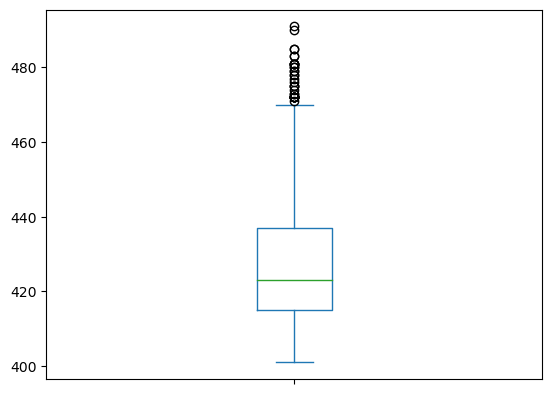

In [30]:
(df_coor_tas_indep['end'] - df_coor_tas_indep['start']).plot(kind='box')

In [31]:
bed_tas_indep = BedTool().from_dataframe(df_coor_tas_indep)
bed_tas_indep
# print(bed_tas_indep)

<BedTool(/var/folders/79/yd907p9x4537vqhgfrm0md680000gn/T/pybedtools.w05ojosv.tmp)>

#### getfasta use bed obj and genome.fa ± 200bp

In [32]:
# 指定参考基因组序列信息，并从中获取每个序列信息
fasta_tas_indep = bed_tas_indep.getfasta(
    fi=f'{HOME}/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa')

# 将region序列信息转为dataframe
df_seqinfo_tas_indep = pd.DataFrame(fasta_tas_indep.print_sequence().split('>')[1:], columns=['info'])
df_seqinfo_tas_indep[['coordinate', 'sequence']] = df_seqinfo_tas_indep['info'].str.strip().str.split('\n', expand=True)

# 去掉序列中含有N的 region（可能坐落于端粒或中性粒，影响分析）
df_seqinfo_tas_indep = df_seqinfo_tas_indep.query('~sequence.str.upper().str.contains("N")').copy()

# 整理dataframe
df_seqinfo_tas_indep[['ctcf_chrom', 'ctcf_start', 'ctcf_end']] = (
    df_seqinfo_tas_indep['coordinate']
    .str.replace(':', '\t')
    .str.replace('-', '\t')
    .str.split('\t', expand=True)
)
df_seqinfo_tas_indep[['ctcf_start', 'ctcf_end']] = df_seqinfo_tas_indep[['ctcf_start', 'ctcf_end']].astype(int)
df_seqinfo_tas_indep = df_seqinfo_tas_indep[['ctcf_chrom', 'ctcf_start', 'ctcf_end', 'sequence']].copy()
df_seqinfo_tas_indep['sequence'] = df_seqinfo_tas_indep['sequence'].str.upper()
df_seqinfo_tas_indep['region_index'] = (
        df_seqinfo_tas_indep['ctcf_chrom']
        + '_'
        + (df_seqinfo_tas_indep['ctcf_start'] + 200).astype(str)
        + '_'
        + (df_seqinfo_tas_indep['ctcf_end'] - 200).astype(str)
)
# df_seqinfo_tas_indep
df_arts_tas_indep_add_seq = pd.merge(df_arts_tas_indep, df_seqinfo_tas_indep, on='region_index', how='left')
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
0,chr16,813606,813742,chr16_813656_813692,chr16,813690,813706,-,34,T,15,2,15,2,0,0,77.0,TCCGCGGCGGGGCGGTC,|X|||||||||||X|||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,41,chr16,813456,813892,GCAAGTGCCCGGAGCTCTCGGCCATCATGTGCGAAT...
1,chr8,38787611,38787720,chr8_38787661_38787670,chr8,38787647,38787663,+,7,T,15,2,15,2,0,0,77.0,TACGCGGCGGGGCCGCC,|||||||||||||X|X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,42,chr8,38787461,38787870,CGCGCCTCTGCTGGAAACGCTTGCTGGCGCCTGTCA...
2,chr17,19513922,19514081,chr17_19513972_19514031,chr17,19514039,19514055,-,8,T,11,6,16,1,5,0,76.0,TAGACAGCGAAACTGTC,||X.|.|||...|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,46,chr17,19513772,19514231,TAGAATTATTAATATTTCCAAGGCTAAGAAACTCAT...
3,chr16,1413823,1413967,chr16_1413873_1413917,chr16,1413894,1413910,+,7,T,14,3,15,2,1,0,75.0,TACACGTCGGGGCTGTA,|||.||X|||||||||X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,63,chr16,1413673,1414117,GAAATGCCGCCCCAGCATCCCTGGTCACTAGAAAAT...
4,chr17,46978434,46978550,chr17_46978484_46978500,chr17,46978498,46978514,-,14,G,14,3,16,1,2,0,72.0,GACGCGGCGAGACTGTC,X||||||||.|.|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,104,chr17,46978284,46978700,CACCCGCACCAACGTACACACAAAACTCCCACGCGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,chr11,66282584,66282698,chr11_66282634_66282648,chr11,66282648,66282664,-,14,C,8,9,8,9,0,0,4.0,CCACATGTGGCCGCCAG,|||XX|X||X|XX|XXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27131,chr11,66282434,66282848,GGCCATGCCCCCTTCCTCTCTGTCTCCGCCCCCAGC...
3181,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133,chr3,47475842,47476253,CGACGGGGGCGGCAGCAGGGGCGGAGCGCGGCGTGC...
3182,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134,chr6,30556447,30556863,GAGAGCCAGTGGCACCGAGAGGGCGCCCCGGCGGCG...
3183,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135,chr15,68651056,68651477,AAGGAATGGCGAGGGGTGGGGTGGGTTACTGACTCC...


In [33]:
# True的话说明合并没问题
df_arts_tas_indep_add_seq['id'].sort_values().tolist() == df_arts_tas_indep['id'].sort_values().tolist()

True

In [36]:
os.makedirs('../art_seqinfo/tas-independent', exist_ok=True)

In [37]:
for sample, df in df_arts_tas_indep_add_seq.groupby('<sample>'):
    # 上面的duplication都是0则说明duplication是TAS-Dep_stat alignment过程引入的，简单去重即可
    print(f'df.shape[0] = {df.shape[0]}')
    print('查看是否有duplication', df.duplicated(subset='region_index').sum())

print('=' * 20)
for g, df in df_arts_tas_indep_add_seq.groupby(['<sample>', 'TAS-Dep_stat']):
    sample, dep_stat = g
    print(f'df.shape[0] = {df.shape[0]}')
    print('查看是否有duplication', df.duplicated(subset='region_index').sum())
    # 上面的duplication都是0则说明duplication是TAS-Dep_stat alignment过程引入的，简单去重即可

# df.shape[0] = 95
# 查看是否有duplication 41
# df.shape[0] = 74
# 查看是否有duplication 33
# df.shape[0] = 11
# 查看是否有duplication 2
# df.shape[0] = 734
# 查看是否有duplication 304
# df.shape[0] = 255
# 查看是否有duplication 69
# df.shape[0] = 1098
# 查看是否有duplication 476
# df.shape[0] = 918
# 查看是否有duplication 387
# ====================
# df.shape[0] = 49
# 查看是否有duplication 0
# df.shape[0] = 46
# 查看是否有duplication 0
# df.shape[0] = 35
# 查看是否有duplication 0
# df.shape[0] = 39
# 查看是否有duplication 0
# df.shape[0] = 6
# 查看是否有duplication 0
# df.shape[0] = 5
# 查看是否有duplication 0
# df.shape[0] = 388
# 查看是否有duplication 0
# df.shape[0] = 346
# 查看是否有duplication 0
# df.shape[0] = 109
# 查看是否有duplication 0
# df.shape[0] = 146
# 查看是否有duplication 0
# df.shape[0] = 543
# 查看是否有duplication 0
# df.shape[0] = 555
# 查看是否有duplication 0
# df.shape[0] = 464
# 查看是否有duplication 0
# df.shape[0] = 454
# 查看是否有duplication 0

df.shape[0] = 95
查看是否有duplication 41
df.shape[0] = 74
查看是否有duplication 33
df.shape[0] = 11
查看是否有duplication 2
df.shape[0] = 734
查看是否有duplication 304
df.shape[0] = 255
查看是否有duplication 69
df.shape[0] = 1098
查看是否有duplication 476
df.shape[0] = 918
查看是否有duplication 387
df.shape[0] = 49
查看是否有duplication 0
df.shape[0] = 46
查看是否有duplication 0
df.shape[0] = 35
查看是否有duplication 0
df.shape[0] = 39
查看是否有duplication 0
df.shape[0] = 6
查看是否有duplication 0
df.shape[0] = 5
查看是否有duplication 0
df.shape[0] = 388
查看是否有duplication 0
df.shape[0] = 346
查看是否有duplication 0
df.shape[0] = 109
查看是否有duplication 0
df.shape[0] = 146
查看是否有duplication 0
df.shape[0] = 543
查看是否有duplication 0
df.shape[0] = 555
查看是否有duplication 0
df.shape[0] = 464
查看是否有duplication 0
df.shape[0] = 454
查看是否有duplication 0


In [38]:
# 查看重复的来源
(
    df_arts_tas_indep_add_seq
    .query('region_index=="chr1_2044988_2044998"')
    .sort_values(['chrom', 'start', 'end', 'align_chr_start'])
)

# DetectSeq_JAK2-DddA11 _REP-2 Right
# DetectSeq_SIRT6-DddA11_REP-1 Right
# DetectSeq_JAK2-DddA11 _REP-2 Left
# DetectSeq_SIRT6-DddA11_REP-1 Left

# 所以重复是合理的

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
3141,chr1,2044938,2045048,chr1_2044988_2044998,chr1,2044960,2044976,+,12,C,8,9,9,8,1,0,11.0,CCAGCCCGAGCCCCGTC,|||XXX|X.X|XX|||X,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27070,chr1,2044788,2045198,AAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCA...
959,chr1,2044938,2045048,chr1_2044988_2044998,chr1,2044992,2045008,-,4,C,11,6,12,5,1,0,38.0,CCAGGAGGGGGCGCAGG,||.|||||XX||X|XX|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Right,12006,chr1,2044788,2045198,AAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCA...
2857,chr1,2044938,2045048,chr1_2044988_2044998,chr1,2045005,2045020,+,-32,C,12,4,12,4,0,1,20.0,CTGGGCAAG-CTCCGCA,|||XXX|||-|||X|||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,26271,chr1,2044788,2045198,AAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCA...
1985,chr1,2044938,2045048,chr1_2044988_2044998,chr1,2045022,2045038,+,-50,T,9,8,10,7,1,0,30.0,TGCGCGCGGCCGCCAGC,|X||||XX|XX||X.X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,20144,chr1,2044788,2045198,AAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCA...


In [39]:
def get_fasta(x):
    region_index = x['region_index']
    c_chrom = x['ctcf_chrom']
    c_start = x['ctcf_start']
    c_end = x['ctcf_end']
    seq = x['sequence']
    return f'>region_index:{region_index}; query_seq_index:{c_chrom}_{c_start}_{c_end}\n{seq}\n'


for sample, df in df_arts_tas_indep_add_seq.groupby('<sample>'):
    # 上面的一个cell中的代码已经证明了duplication是TAS-Dep_stat alignment过程引入的，简单去重即可
    df = df.drop_duplicates(subset=['region_index'], keep='first')
    text = ''.join(df.apply(get_fasta, axis=1).tolist())
    with open(f'../art_seqinfo/tas-independent/seqinfo_{sample}_independent.fa', 'wt') as f:
        f.write(text)
# wc -l *.fa
# 108 seqinfo_DetectSeq_ATP8-DddA11_REP-1_independent.fa
# 82 seqinfo_DetectSeq_ATP8-DddA6_REP-1_independent.fa
# 18 seqinfo_DetectSeq_ATP8-DddAwt_REP-1_independent.fa
# 860 seqinfo_DetectSeq_JAK2-DddA11_REP-1_independent.fa
# 372 seqinfo_DetectSeq_JAK2-DddA11_REP-2_independent.fa
# 1244 seqinfo_DetectSeq_SIRT6-DddA11_REP-1_independent.fa
# 1062 seqinfo_DetectSeq_SIRT6-DddA11_REP-2_independent.fa
# 3746 total

# for i in `ls *.fa`
# echo `uniq $i | wc -l`
# 108
# 82
# 18
# 860
# 372
# 1244
# 1062

### Motif analysis
see file **meme_chip_step_by_step.sh**
```bash
DIR=/home/zhaohuanan/0.apps/meme_suite/meme-5.5.3
export PATH=$DIR/bin:$DIR/libexec/meme-5.5.3:$PATH

mkdir -p \
    motif_pre_processing \
	motif_discovery/meme \
	motif_discovery/streme \
	motif_scanning/fimo \
    motif_comparison/tomtom \
    motif_enrichment/centrimo \
    motif_enrichment/spamo


for i in `ls *.fa`
# for i in seqinfo_DetectSeq_ATP8-DddA11_REP-1_independent.fa  # for test
do
    ########################################
    #### files ####
    ########################################
    # motif_pre_processing
    SEQ_LENGTH=400
    METRICS=motif_pre_processing/${i}.metrics
    SEQ_CENTERED=motif_pre_processing/${i}.seq_centered
    BFILE=motif_pre_processing/${i}.background
    
    ### Motif Discovery
    ### 预测输入序列上的motif信息
    ### de novo motif discovery
    MEME=motif_discovery/meme/$i
    STREME=motif_discovery/streme/$i

    ### Motif Enrichment
    ### 分析已知的motif在输入序列上的富集情况
    CENTRIMO=motif_enrichment/centrimo/$i
    SPAMO=motif_enrichment/spamo/$i

    # ### Motif Scanning
    # ### 分析输入序列上可能的motif出现的位置
    FIMO=motif_scanning/fimo/$i
    
    # ### Motif Comparison
    # ### 比较不同motif之间的相似性
    TOMTOM=motif_comparison/tomtom/${i}
    

    
    echo '===================================================>'
	echo 'pre-processing' # √
    echo '===================================================>'
	getsize $i 1> $METRICS
	fasta-most -min 50 < $i 1>> $METRICS  # test
	fasta-center -dna -len $SEQ_LENGTH < $i 1> $SEQ_CENTERED
	fasta-get-markov -nostatus -nosummary -dna -m 2 $i $BFILE

 
    echo '===================================================>'
	echo 'Motif Discovery: de novo motif discovery' # √
    echo '===================================================>'
	echo -e '\trun MEME'
	meme -dna -nmotifs 3 -maxw 50 -bfile $BFILE -revcomp -oc $MEME $i
    # nmotifs: 最多报告3个motifs
    # revcomp: allow sites on + or - DNA strands
    # nostatus: do not print progress reports to terminal
    
	echo -e '\trun STREME'
	streme -dna --nmotifs 3 --maxw 30 --p $SEQ_CENTERED --oc $STREME
    # STREME: The maximum allowed motif width is 30


    echo '===================================================>'
	echo 'Motif Enrichment: 分析已知的motif在输入序列上的富集情况' # √
    echo '===================================================>'
    echo -e '\trun CentiMo'
	centrimo -seqlen $SEQ_LENGTH -bfile $BFILE $SEQ_CENTERED $MEME/meme.xml \
     $STREME/streme.xml \
     -oc $CENTRIMO
 
    echo -e '\trun SpaMo'
	spamo -bgfile $BFILE -keepprimary -oc $SPAMO $i $MEME/meme.xml $STREME/streme.xml

    
    echo '===================================================>'
	echo 'motif scanning'  # √
    echo '===================================================>'
    echo -e '\trun FIMO'
    fimo --oc $FIMO --bgfile $BFILE $MEME/meme.xml $i

    echo '===================================================>'
	echo 'motif comparison'  # √
    echo '===================================================>'

	echo -e '\trun TOMTOM'
	tomtom -oc $TOMTOM $MEME/meme.xml \
     $HOME/1.database/db_meme_suite/motif_databases/JASPAR/JASPAR2022_CORE_redundant_v2.meme


done
```

#### run scripts above, wait and next
在veteran服务器上跑，剩下的继续在本地分析

### save df_arts_tas_indep_add_seq

In [40]:
df_arts_tas_indep_add_seq.to_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv', index=False)

### Biological repeat correlation (JAK2 & SIRT6)

In [42]:
# df_arts_tas_indep_add_seq = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv')

#### CTCF-off and CTCF-no-off performance

### unassorted off-target
deeptools?

#### Final unassorted off-target

In [ ]:
df_arts_unassorted

# STOP TODO

homer findMotifsGenome using unassorted (TAS-independent) off-target bed information

In [ ]:
sort_keys = [
    'DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',  # SIRT6
    'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',  # JAK2
    'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1',  # ATP8
]

# print(df_arts_tale_dep.head(2))
# print('-' * 100)
# print(df_arts.head(2))
df_arts

##### 

In [ ]:
ls = []
for sample in sort_keys:
    tas_dep_index = sorted(df_arts_tale_dep.query('`<sample>`==@sample')['region_index'].unique().tolist())
    tas_indep_index = sorted(df_arts.query('`<sample>`==@sample').query('region_index not in @tas_dep_index')[
                                 'region_index'].unique().tolist())
    ls.append([sample, len(tas_dep_index), len(tas_indep_index), len(tas_dep_index) + len(tas_indep_index)])
    # |    | <sample>                     |   TAS-dep |   putative TAS-indep |   Total |
    # |---:|:-----------------------------|----------:|---------------------:|--------:|
    # |  0 | DetectSeq_SIRT6-DddA11_REP-1 |        68 |                 3331 |    3399 |
    # |  1 | DetectSeq_SIRT6-DddA11_REP-2 |       230 |                 9163 |    9393 |
    # |  2 | DetectSeq_JAK2-DddA11_REP-1  |        24 |                  797 |     821 |
    # |  3 | DetectSeq_JAK2-DddA11_REP-2  |       184 |                  573 |     757 |
    # |  4 | DetectSeq_ATP8-DddA11_REP-1  |       128 |                   87 |     215 |
    # |  5 | DetectSeq_ATP8-DddA6_REP-1   |       512 |                  260 |     772 |
    # |  6 | DetectSeq_ATP8-DddAwt_REP-1  |        18 |                   22 |      40 |

    df_out = df_arts.query('`<sample>`==@sample').query('region_index not in @tas_dep_index')

    df_out[['chrom', 'start', 'end']] = df_out['region_index'].str.split('_', expand=True)
    df_out = df_out[['chrom', 'start', 'end', 'region_index', 'align_strand']].copy()
    df_out.insert(4, 'score', '.')
    df_out['start'] = df_out['start'].astype(int) - 30
    df_out['end'] = df_out['end'].astype(int) + 30
    df_out.to_csv(f'../art/from_art_putative_IND_{sample}.bed', header=False, index=False, sep='\t')
print(pd.DataFrame(ls, columns=['<sample>', 'TAS-dep', 'putative TAS-indep', 'Total']).to_markdown())

```bash
findMotifsGenome.pl from_art_putative_IND_DetectSeq_ATP6.1-DddSs.bed $HOME/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa homer_putative_IND_DetectSeq_ATP6.1-DddSs -size 50 -mask
...
...
...
```

## homer annotatePeaks for all off-target

```bash
cd final_list_after_igv_check

annotatePeaks.pl 2023-04-20_DetectSeq_ATP8-DddA11_REP-1_final_list.mpmat hg38 -annStats ../annoResults/ATP8-DddA11_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_ATP8-DddA6_REP-1_final_list.mpmat hg38 -annStats ../annoResults/ATP8-DddA6_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_ATP8-DddAwt_REP-1_final_list.mpmat hg38 -annStats ../annoResults/ATP8-DddAwt_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_JAK2-DddA11_REP-1_final_list.mpmat hg38 -annStats ../annoResults/JAK2-DddA11_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_JAK2-DddA11_REP-2_final_list.mpmat hg38 -annStats ../annoResults/JAK2-DddA11_REP-2.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_SIRT6-DddA11_REP-1_final_list.mpmat hg38 -annStats ../annoResults/SIRT6-DddA11_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_SIRT6-DddA11_REP-2_final_list.mpmat hg38 -annStats ../annoResults/SIRT6-DddA11_REP-2.homer_log &

bioat table merge -input_fmt tsv -output_fmt csv --input_header True --output_header True ATP8-DddA11_REP-1.homer_log,ATP8-DddA6_REP-1.homer_log,ATP8-DddAwt_REP-1.homer_log,JAK2-DddA11_REP-1.homer_log,JAK2-DddA11_REP-2.homer_log,SIRT6-DddA11_REP-1.homer_log,SIRT6-DddA11_REP-2.homer_log ATP8-DddA11_REP-1.homer_log,ATP8-DddA6_REP-1.homer_log,ATP8-DddAwt_REP-1.homer_log,JAK2-DddA11_REP-1.homer_log,JAK2-DddA11_REP-2.homer_log,SIRT6-DddA11_REP-1.homer_log,SIRT6-DddA11_REP-2.homer_log homer.annoResults.merge.csv
```

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('../annoResults/homer.annoResults.merge.csv')

filt = ['Promoter', '5UTR', '3UTR', 'Exon', 'Intron', 'TTS', 'Intergenic']

df = df[df['Total size (bp)'].str.isdecimal()].copy()
df.drop_duplicates(subset=['<sample>', 'Annotation'], keep='first', inplace=True)
df = df[df['Annotation'].map(lambda x: x in filt)].copy()
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
df

In [ ]:
from lets_plot import *
from lets_plot.mapping import as_discrete

In [ ]:
LetsPlot.setup_html()

In [ ]:
(
        ggplot(data=df, mapping=aes(x=as_discrete("Annotation", order=-1), y="Log2 Ratio (obs/exp)", fill='<sample>'))
        + geom_bar(stat='identity', position='dodge', width=0.7)
        # + scale_x_discrete(labels=filt)
        + ggsize(1000, 500)
    # + facet_grid(y='<sample>', scales='free')
    # + scale_y_continuous(limits=(-2, 10))
)